# Simple Linear Regression

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition'
                 '/master/ch10/housing.data.txt',
                 header=None,
                 sep=r'\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
               'NOX', 'RM', 'AGE', 'DIS', 'RAD',
               'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
               
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


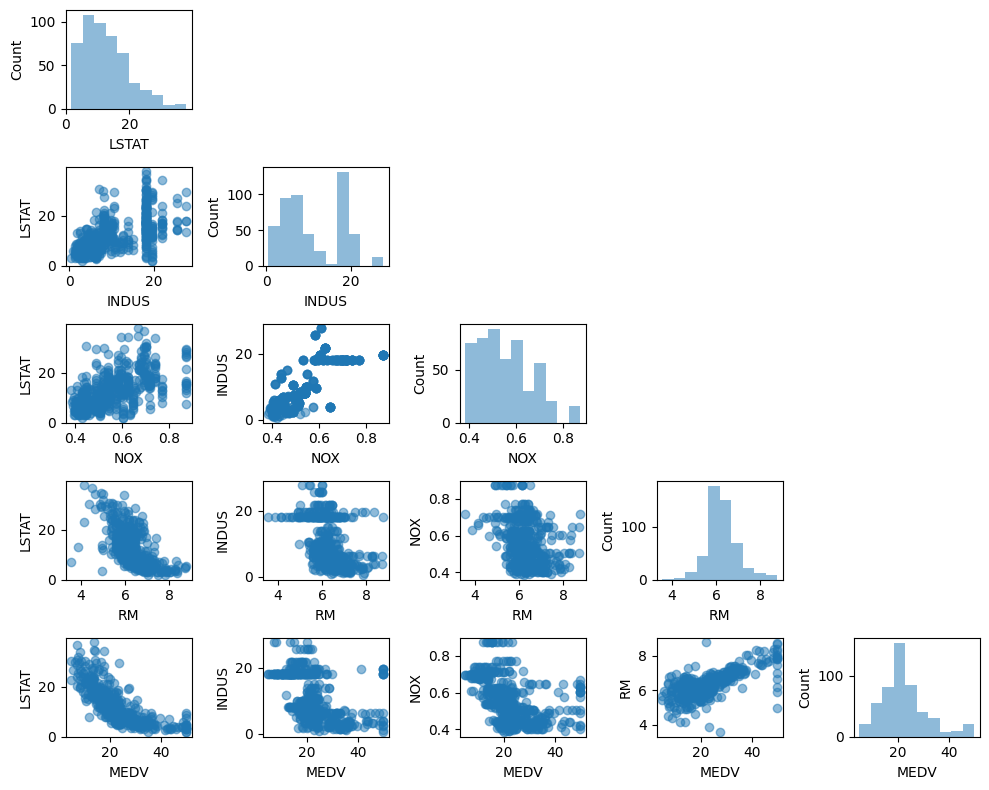

In [3]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
scatterplotmatrix(df[cols].values, figsize=(10, 8),
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

Looking at the scatterplots, we can infer a few things:
1. There seems to be a linear relationship between RM and MEDV
2. RM has a normal distribution
3. MEDV has a normal distribution with some outliers


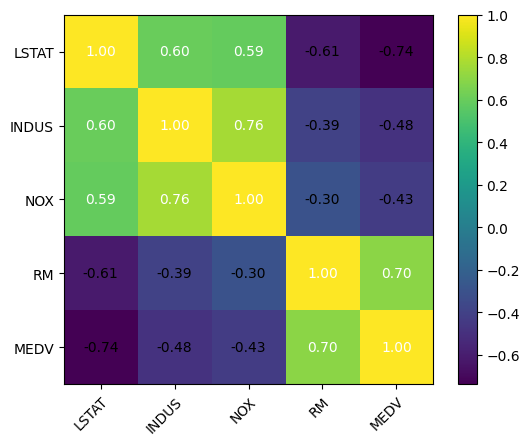

In [5]:
from mlxtend.plotting import heatmap
import numpy as np

cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm,
             row_names=cols,
             column_names=cols)
plt.show()

Linear regression function is the same as the Adaline function, but we remove the unit step function that Adaline uses to return a binary classification.

The cost function we'll be using is ordinary least squares (OLS), which is the same as the sum of squared errors (SSE) cost function we used in Adaline.

$$
J(w) = \frac{1}{2} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2
$$

- $1/2$ is used to make the math easier when taking the derivative of the cost function during gradient descent as the derivative of $X^2$ is $2X$ which cancels out the $1/2$ in the cost function.
- $\hat{y}^{(i)} = w^T x^{(i)}$ is the prediction for the $i$th training sample.
- $y^{(i)}$ is the true label for the $i$th training sample.
- $m$ is the number of training samples.



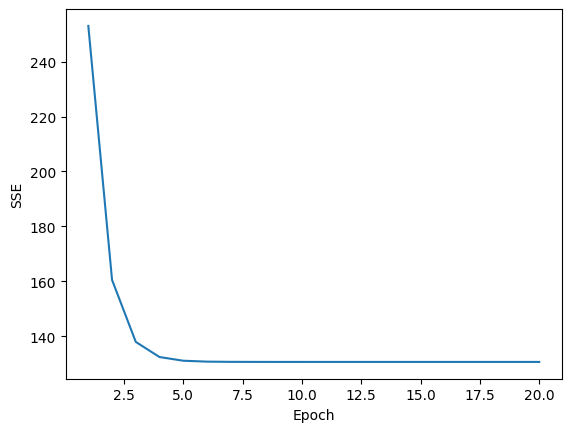

In [6]:
import sys
import os

current_dir = os.path.abspath('')

src_dir = os.path.join(current_dir, '..', '..', 'src')

sys.path.append(src_dir)

from sklearn.preprocessing import StandardScaler
from linearregression.linearRegressionGD import LinearRegressionGD

# We'll be using the RM feature to predict the MEDV feature as it has the highest correlation with MEDV
X = df[['RM']].values
y = df['MEDV'].values

sc_x = StandardScaler()
sc_y = StandardScaler()

# Standardize the features
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

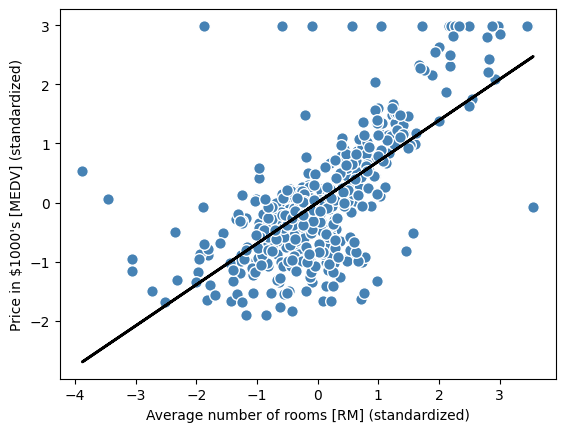

In [7]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

While RM does somewhat predict MEDV, it's not a perfect fit for price predictions.
We can also see that MEDV appears to be clipped at around 3, possibly due to the standardization of the data. This can be fixed by using the inverse of the standardization transformation.

In [13]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
# Reshape price_std to 2D array before inverse transform
price_std = price_std.reshape(-1, 1)
# Extract the scalar value from the array using item()
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std).item())

Price in $1000s: 10.840
